# Classification

Classification Techniques are an essential part of machine learning and data mining aplications. Approximately 70% of problems in Data Science are classification Problems

There are lots of classification problems that are available, but the logistics regression is common and is useful regression method forsolving the binary classification problem.

Another Category of classification is Multinomial Classification which handles the issuess where multiple classses are present in the target varaible.

Logistic Regression can be used for various classification problems such as:

1.Spam Detection

2.Diabetes prediction

3.If a given customer will purchase a particular product or will they 
churn another competitor.

4.Whether the user will click on a given advertisement link or not.

## Assumptions

1.The Dependent variable should be BINARY

2.Only the meaningful variables should be included.

3.The indpendent variable should be independent of each other. That is the model should have little or no multicollinearity.

4.Logistic regression requires quite large sample sizes.

In [1]:
#So Current project of Survival Prediction of Titanic Dataset 
#is based on the logistic regression 

## Logistic Regression

Logistic Regression is a ML classification algorithm that is used to predict the probability of a categorical dependent variable. 

In logistic regression, the dependent variable is a binary variable that contains data coded as 1(YES) or 0(NO).

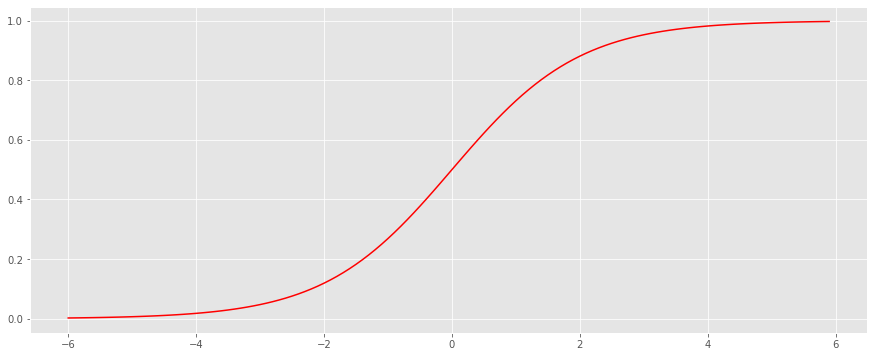

In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
plt.figure(figsize = (15,6))
def sigmoid(t):#Define the sigmoid function
    return (1/(1+np.e**(-t)))

plot_range = np.arange(-6,6,0.1)
y_values = sigmoid(plot_range)

#Plot curve
plt.plot(plot_range,y_values , color="red")
#plot_range is x-axis range
#y_values are predicted values


 The Sigmoid function also called Logistic function gives a 'S' shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1 and if the curve goes to negative infinity y_predicted will become 0.

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

## Example model of Logistic Regression

Based on the age of the user, whether he would subscribe to a service or not.Where 1 means he would subscribe to the service and 0 means he would not.

In [4]:
subs = pd.read_excel('https://s3.amazonaws.com/thinkific/file_uploads/287654/attachments/2ef/ba7/2a7/Subscription.xlsx')

In [6]:
subs.head()

,Age,Subscription
0,62,1
1,18,0
2,40,0
3,51,1
4,37,1


In [7]:
subs.shape

(200, 2)

In [9]:
#what type of values are stored in the columns?
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           200 non-null    int64
 1   Subscription  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [10]:
#Lets look at some statistical information about our dataframe
subs.describe()

,Age,Subscription
count,200.000000,200.000000
mean,39.595000,0.500000
std,13.489656,0.501255
min,18.000000,0.000000
25%,29.750000,0.000000
50%,39.000000,0.500000
75%,51.000000,1.000000
max,65.000000,1.000000


## Defining X and Y

In [15]:
X = subs.iloc[:,:-1].values
X.shape

(200, 1)

In [13]:
Y = subs.iloc[:,-1].values
Y.shape

(200,)

## Splitting the dataset

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [17]:
X_train.shape

(150, 1)

In [18]:
X_test.shape

(50, 1)

In [22]:
Y_train.shape

(150,)

In [23]:
Y_test.shape

(50,)

## Building the model

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train , Y_train)

LogisticRegression()

In [30]:
Y_pred = lr.predict(X_test)

In [31]:
Y_test

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1], dtype=int64)

In [32]:
Y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1], dtype=int64)

# Model Evaluation Using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm fundamental of a confusion matrix is the number of correct and incorrect prediction are summed up class-wise.

In [33]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test,Y_pred)
print(confusion)

[[16  7]
 [ 8 19]]


Here you can see the confusion matrix in the form of array object. THe dimension of this matrix is 2X2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.

In the output, 16 and 19 are accurate predictions and 8 and 19 are incorrect predictions.

## Basic Terminology

->True Positive(TP): We correctly predicted the Actual Positive Data

->True Negative(TN): We correctly predicted the Actual Negative Data

->False Positive(FP):  We incorrectly predicted the Actual Negative Data as Positive(Type I Error)

->False Negative(FN): We incorrectly predicted the Actual Positive Data as Negative(Type II Error)

16-TN
7-FP
8-FN
19-TP

correct Predictions  = TP + TN

Accuracy = (16+19)/(16+7+8+19)*100 = 70%

In [34]:
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

In [36]:
print(confusion)
print("TN:",TN)
print("FP:",FP)
print("FN:",FN)
print("TP:",TP)

[[16  7]
 [ 8 19]]
TN: 16
FP: 7
FN: 8
TP: 19


In [39]:
confusion_matrix = pd.DataFrame(confusion)
confusion_matrix.columns = ['Predicted NO Subscription' , 'Predicted YES Subscription']
confusion_matrix = confusion_matrix.rename(index = {0:'Actual NO Subscription', 1:'Actual YES Subscription'})
confusion_matrix

,Predicted NO Subscription,Predicted YES Subscription
Actual NO Subscription,16,7
Actual YES Subscription,8,19


# Confusion Matrix Evalutaion Metrics

Lets Evaluate the model using model evaluation metrics such as accuracy, precision and recall.

### Classification Accuracy 

Overall, How often is the classifier correct? is called clasification accuracy.

In [40]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test , Y_pred)
accuracy1 = (TN+TP)/(TN+TP+FN+FP)
print("Accuracy from metrics:" ,accuracy)
print("Accuracy calculated:",accuracy1)

Accuracy from metrics: 0.7
Accuracy calculated: 0.7


### Classification Error

Overall,How often is the classifier incorrect? is the classification error

In [42]:
print((FP+FN)/(TN+TP+FN+FP))
print(round(1-metrics.accuracy_score(Y_test,Y_pred),4))

0.3
0.3


### Senstivity:

when the actual value is positive, how often is the prediction correct?

*How Sensitive is the classifier in detecting positive instances?

*Also known as the "TRUE POSITIVE RATE" OR "RECALL"

In [44]:
print("RECALL:",metrics.recall_score(Y_test,Y_pred))
print("CALCULATED RECALL:",(TP)/(TP+FN))

RECALL: 0.7037037037037037
CALCULATED RECALL: 0.7037037037037037


### Specificity:

When the actual value is Negative, How often is the prediction correct?

*How Sensitive is the classifier in detecting negative instances?

*Also known as the "TRUE NEGATIVE RATE"

In [45]:
#SPECIFICTY measures the proportion of actual negatives that are correctly identified as such: TN/N
print("SPECIFICITY/TRUE NEGATIVE RATE:",(TN)/(TN+FP))

SPECIFICITY/TRUE NEGATIVE RATE: 0.6956521739130435


### False Positive Rate:

when the actual value is Positive, How often is the prediction incorrect.?

In [46]:
print("False Positive Rate:",(FN)/(FN+TP))

False Positive Rate: 0.2962962962962963


### False Negative Rate:

when the actual value is Neagative, How often is the prediction incorrect.?

In [48]:
print("False Negative Rate:",(FP)/(TN+TP))

False Negative Rate: 0.2


### Precision:

whent a positive value is predicted how often is the prediction correct?

*How "PRECISE" is the classifier when predicting the positive instances?

In [49]:
print("Precision:",round(metrics.precision_score(Y_test,Y_pred),2))
print("Precision calculated:",round(TP/float(TP+FP),2))

Precision: 0.73
Precision calculated: 0.73


#### f1score = 2pr/(p+r)

In [52]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(Y_test , Y_pred)
recall = recall_score(Y_test , Y_pred)
precision = precision_score(Y_test , Y_pred)
f1 = f1_score(Y_test , Y_pred)
roc_auc = roc_auc_score(Y_test , Y_pred)

print("Accuracy is:",round(accuracy,2)*100)
print("F1 Score is:",round(f1,2)*100)
print("Precision is:",round(precision,2)*100)
print("Recall is:",round(recall,2)*100)
print("Roc_Auc is:",round(roc_auc,2)*100)

Accuracy is: 70.0
F1 Score is: 72.0
Precision is: 73.0
Recall is: 70.0
Roc_Auc is: 70.0


In [54]:
#CLASSIFICATION REPORT

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68        23
           1       0.73      0.70      0.72        27

    accuracy                           0.70        50
   macro avg       0.70      0.70      0.70        50
weighted avg       0.70      0.70      0.70        50

